In [8]:
from models.nn_model_v2 import check_all_attr, dataload_preprocessing_svm
from sklearn.model_selection import train_test_split
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
# from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# pip install ipykernel
# pip3 install torch torchvision
# pip install pandas
# pip install matplotlib
# pip install torchsummary

In [9]:
# data loading and preprocessing
check_all_attr() # 주석을 해제해 모든 데이터 특성이름을 확인하세요.


==Data attributes included==
  1 ~  5 |  'female' , 'black' , 'hisp' , 'asian' , 'other'
  6 ~ 10 |  'age' , 'agesq' , 'g11ses' , 'g9ses' , 'g11math'
 11 ~ 15 |  'g9math' , 'hs_par' , 'lfaminc0811' , 'twoparguar' , 'singlepar'
 16 ~ 20 |  'lesshalf' , 'g9nonnative' , 'g9partalkclg' , 'g9schtalkclg' , 'g11catholic'
 21 ~ 25 |  'g11otherprivate' , 'g9catholic' , 'g9otherprivate' , 'g11city' , 'g11suburb'
 26 ~ 30 |  'g11town' , 'g11northeast' , 'g11midwest' , 'g11south' , 'g9city'
 31 ~ 35 |  'g9suburb' , 'g9town' , 'g9northeast' , 'g9midwest' , 'g9south'
 36 ~ 40 |  'm_s2controlsborn_yes' , 's2mcontrolsborn_yes' , 'm_s2controlsstoptrying_yes' , 's2mcontrolsstoptrying_yes' , 'm_s2controlschallenge_yes'
 41 ~ 45 |  's2mcontrolschallenge_yes' , 'repeatg9' , 'high_sci_nosci' , 'high_sci_gensci' , 'high_sci_spesci'
 46 ~ 50 |  'high_sci_advsci' , 'high_sci_apib' , 'exp9ed_dontknow' , 'exp9ed_hs' , 'exp9ed_aa'
 51 ~ 55 |  'exp9ed_ba' , 'exp9ed_grad' , 'exp11ed_hsbroad' , 'exp11ed_aa' , 'exp1

In [10]:
non_use_attr =['age','agesq']
# non_use_attr = [
#     'g11ses' , 'g9ses' , 'g11math',
#     'g9math' , 'hs_par' , 'lfaminc0811' , 'twoparguar' , 'singlepar',
#     'lesshalf' , 'g9nonnative' , 'g9partalkclg' , 'g9schtalkclg' , 'g11catholic',
#     'g11otherprivate' , 'g9catholic' , 'g9otherprivate' , 'g11city' , 'g11suburb',
#     'g11town' , 'g11northeast' , 'g11midwest' , 'g11south' , 'g9city',
#     'g9suburb' , 'g9town' , 'g9northeast' , 'g9midwest' , 'g9south',
#     'm_s2controlsborn_yes' , 's2mcontrolsborn_yes' , 'm_s2controlsstoptrying_yes' , 's2mcontrolsstoptrying_yes' , 'm_s2controlschallenge_yes' ,      
#     's2mcontrolschallenge_yes' , 'repeatg9' , 'high_sci_nosci' , 'high_sci_gensci' , 'high_sci_spesci',
#     'high_sci_advsci' , 'high_sci_apib' , 'exp9ed_dontknow' , 'exp9ed_hs' , 'exp9ed_aa',
#     'exp9ed_ba' , 'exp9ed_grad' , 'exp11ed_hsbroad' , 'exp11ed_aa' , 'exp11ed_ba',
#     'exp11ed_grad' , 'req_ed_occ09_notknow' , 'reqed_occ09_hs' , 'reqed_occ09_aa' , 'reqed_occ09_ba',
#     'reqed_occ09_grad' , 'req_ed_occ12_notknow' , 'reqed_occ12_hs' , 'reqed_occ12_aa' , 'reqed_occ12_ba',
#     'reqed_occ12_grad']
X, y = dataload_preprocessing_svm(non_use_attr)

y = np.asarray(y).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Number of data attributes:  66
2  data attributes are removed.
Number of data attributes in Traing/Testing process:  64


In [11]:
# Training Classifiers
clf1 = DecisionTreeClassifier(max_depth=5, random_state=42)
clf2 = RandomForestClassifier(n_estimators=10, random_state=42)
clf3 = AdaBoostClassifier(n_estimators=100, random_state=42)
clf4 = SVC(gamma=0.1, kernel="rbf", probability=True, random_state=42)
clf5 = SVC(gamma=0.1, kernel="poly", probability=True, random_state=42)
clf6 = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
clf7 = LogisticRegression(max_iter=1000, random_state=42)
eclf = VotingClassifier(estimators=[("dt", clf1), ("randomforest", clf1), ("svc", clf3)], voting="soft", weights=[2, 1, 2])


In [12]:
classifiers = [clf1, clf2, clf3, clf4, clf5, clf6, clf7, eclf]
clf_name = ['DecisionTree', 'RandomForest', 'ADaBoost','SVM(RBF)', 'SVM(POLY)', 'SGDClassifier', 'LogisticRegression', 'Soft Voting']
target_names = ['pass', 'dropout']

In [13]:
for i, clf in enumerate(classifiers):
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('-----------------------------------------------------')
    score = accuracy_score(y_test, y_pred)
    print(' %s accuracy_score:  %.3f' % (clf_name[i], score))
    print('-----------------------------------------------------')
    print(classification_report(y_test, y_pred, target_names=target_names))

-----------------------------------------------------
 DecisionTree accuracy_score:  0.911
-----------------------------------------------------
              precision    recall  f1-score   support

        pass       0.92      0.99      0.95      1498
     dropout       0.58      0.07      0.13       149

    accuracy                           0.91      1647
   macro avg       0.75      0.53      0.54      1647
weighted avg       0.88      0.91      0.88      1647

-----------------------------------------------------
 RandomForest accuracy_score:  0.908
-----------------------------------------------------
              precision    recall  f1-score   support

        pass       0.91      0.99      0.95      1498
     dropout       0.41      0.05      0.08       149

    accuracy                           0.91      1647
   macro avg       0.66      0.52      0.52      1647
weighted avg       0.87      0.91      0.87      1647

-----------------------------------------------------
 A

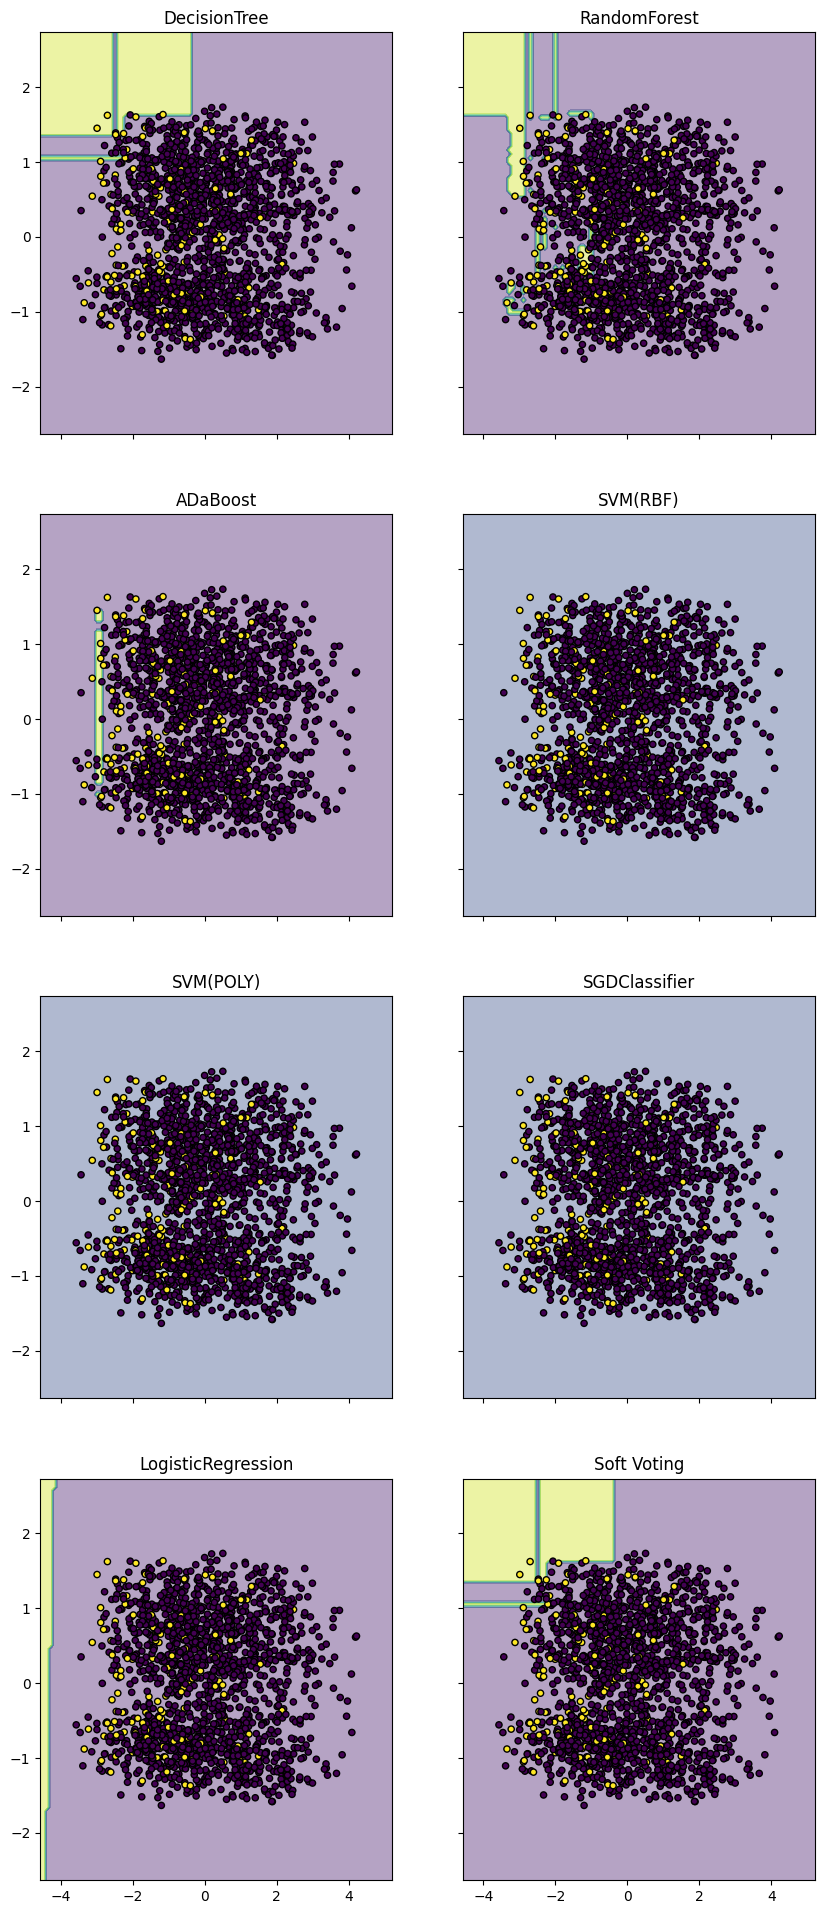

In [14]:
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay

pca = PCA(n_components=2)
X_pca_test = pca.fit_transform(X_test)

clf1 = DecisionTreeClassifier(max_depth=5, random_state=42)
clf2 = RandomForestClassifier(n_estimators=10, random_state=42)
clf3 = AdaBoostClassifier(n_estimators=100, random_state=42)
clf4 = SVC(gamma=0.1, kernel="rbf", probability=True, random_state=42)
clf5 = SVC(gamma=0.1, kernel="poly", probability=True, random_state=42)
clf6 = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
clf7 = LogisticRegression(max_iter=1000, random_state=42)
eclf = VotingClassifier(estimators=[("dt", clf1), ("randomforest", clf1), ("svc", clf3)], voting="soft", weights=[2, 1, 2])

for i, clf in enumerate(classifiers):
    clf = clf.fit(X_pca_test, y_test)

# Plotting decision regions
f, axarr = plt.subplots(4, 2, sharex="col", sharey="row", figsize=(10, 24))
for idx, clf, tt in zip(product([0, 1, 2, 3], [0, 1]), classifiers, clf_name):
    DecisionBoundaryDisplay.from_estimator(clf, X_pca_test, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict")
    axarr[idx[0], idx[1]].scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=y_test, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()